# Regression in Keras

In [1]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=1000, n_features=10, n_informative=8, noise=5, random_state=42)

In [2]:
X

array([[-0.70766947,  2.1221562 , -1.26088395, ...,  1.03246526,
        -0.48423407,  0.44381943],
       [ 0.6686548 , -0.73095628, -0.53533509, ...,  0.75792185,
         1.84860883,  0.09806754],
       [ 0.69161858, -0.62451046, -1.04552949, ...,  0.74698084,
         0.69007368,  0.27311843],
       ...,
       [-1.50653403,  2.492184  ,  0.24945095, ..., -0.27512143,
         0.11657851, -1.96555589],
       [-0.25153889,  1.1941094 , -1.72580673, ..., -0.98116553,
         0.46206089, -0.59751019],
       [ 0.29879778,  0.05837029, -0.02549413, ..., -0.60385893,
        -2.08579244, -0.77345584]])

In [3]:
Y

array([-1.03027373e+02,  9.02186403e+01,  6.30280786e+01,  8.54139625e+01,
       -2.95655208e+02,  1.04328567e+02, -3.38569343e+01,  8.86610676e+01,
        9.95552557e+01, -9.39171306e+01,  1.02373574e+02, -1.77590528e+02,
       -1.11394258e+02, -5.71059141e+01,  2.52477231e+01,  6.91428834e+01,
        5.07879490e+00, -1.40073412e+02,  1.67953146e+02, -8.56916288e+01,
        9.05783941e+01,  1.31756864e+02, -3.21432483e+02, -1.50048403e+02,
       -1.03746895e+02,  4.16313878e+01,  6.25070995e+01,  9.94045084e+01,
        6.07688169e+01, -7.12611872e+01,  2.33469689e+01,  1.33383416e-01,
        1.41209584e+02,  3.50296712e+01, -4.51260249e+01, -8.43652614e+01,
        2.33243831e+01,  2.73501432e+02, -7.39148951e+01, -1.91776504e+02,
        3.83802033e+01, -1.52869765e+02, -8.74607515e+01,  8.64276535e+01,
        9.49901852e+00,  2.68724997e+01, -1.14270103e+02,  7.11683167e+00,
       -1.21934210e+02, -5.13536097e+01,  2.77503368e+01, -4.97053788e+01,
       -2.22307061e+01,  

In [4]:
import pandas as pd
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.707669,2.122156,-1.260884,0.917862,0.774634,-1.519370,1.266911,1.032465,-0.484234,0.443819
1,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
2,0.691619,-0.624510,-1.045529,-0.026261,-0.998212,0.031492,1.087710,0.746981,0.690074,0.273118
3,0.146476,-1.167865,-0.111847,-0.452690,-0.800590,1.107721,0.644311,-0.328375,0.566602,0.523324
4,-2.205566,-0.635362,-1.876553,0.619711,1.274875,-0.624345,-0.604745,-1.189667,-0.184525,0.897066


In [5]:
cols = [f'x{i+1}' for i in range(10)]
cols

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

In [6]:
X.columns = cols
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.707669,2.122156,-1.260884,0.917862,0.774634,-1.519370,1.266911,1.032465,-0.484234,0.443819
1,0.668655,-0.730956,-0.535335,0.358454,1.295872,0.685508,-0.175564,0.757922,1.848609,0.098068
2,0.691619,-0.624510,-1.045529,-0.026261,-0.998212,0.031492,1.087710,0.746981,0.690074,0.273118
3,0.146476,-1.167865,-0.111847,-0.452690,-0.800590,1.107721,0.644311,-0.328375,0.566602,0.523324
4,-2.205566,-0.635362,-1.876553,0.619711,1.274875,-0.624345,-0.604745,-1.189667,-0.184525,0.897066


In [7]:
Y = pd.DataFrame(Y,columns=['y'])
Y.head()

,y
0,-103.027373
1,90.218640
2,63.028079
3,85.413962
4,-295.655208


## Preprocessing the data

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [10]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-0.69209321,  2.18206861, -1.26543322, ...,  1.09423617,
        -0.43895787,  0.47338334],
       [ 0.64356521, -0.72075836, -0.54344359, ...,  0.81492051,
         1.81172327,  0.12284766],
       [ 0.66585048, -0.61245776, -1.05113519, ...,  0.80378932,
         0.69399125,  0.30032054],
       ...,
       [-1.46735396,  2.55854402,  0.23749262, ..., -0.23607963,
         0.14069435, -1.96932793],
       [-0.24943979,  1.23785092, -1.72807528, ..., -0.95439653,
         0.47400898, -0.58235405],
       [ 0.28463624,  0.08232195, -0.03610369, ..., -0.5705314 ,
        -1.98411   , -0.76073407]])

In [11]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.692093,2.182069,-1.265433,0.873005,0.779552,-1.514606,1.231767,1.094236,-0.438958,0.473383
1,0.643565,-0.720758,-0.543444,0.322156,1.331236,0.663828,-0.167724,0.814921,1.811723,0.122848
2,0.665850,-0.612458,-1.051135,-0.056673,-1.096851,0.017656,1.057906,0.803789,0.693991,0.300321
3,0.136815,-1.165280,-0.122033,-0.476578,-0.887685,1.080978,0.627719,-0.290259,0.574868,0.553988
4,-2.145732,-0.623499,-1.878082,0.579416,1.309013,-0.630316,-0.584115,-1.166522,-0.149805,0.932901
...,...,...,...,...,...,...,...,...,...,...
995,0.410202,-0.584442,0.366559,1.180586,-1.394073,-0.420735,0.524218,-2.388030,0.909523,-0.260444
996,1.593855,0.595597,-1.094087,0.522069,0.093360,0.757386,-0.342720,-0.096311,-1.104626,0.092691
997,-1.467354,2.558544,0.237493,0.362306,-0.661741,-0.327408,1.042194,-0.236080,0.140694,-1.969328
998,-0.249440,1.237851,-1.728075,-0.698012,1.465124,-0.472293,0.762655,-0.954397,0.474009,-0.582354


### Train Test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=65)

In [13]:
xtrain.shape

(800, 10)

In [14]:
xtest.shape

(200, 10)

In [15]:
xtrain.shape[1]

10

# Start building the neural network

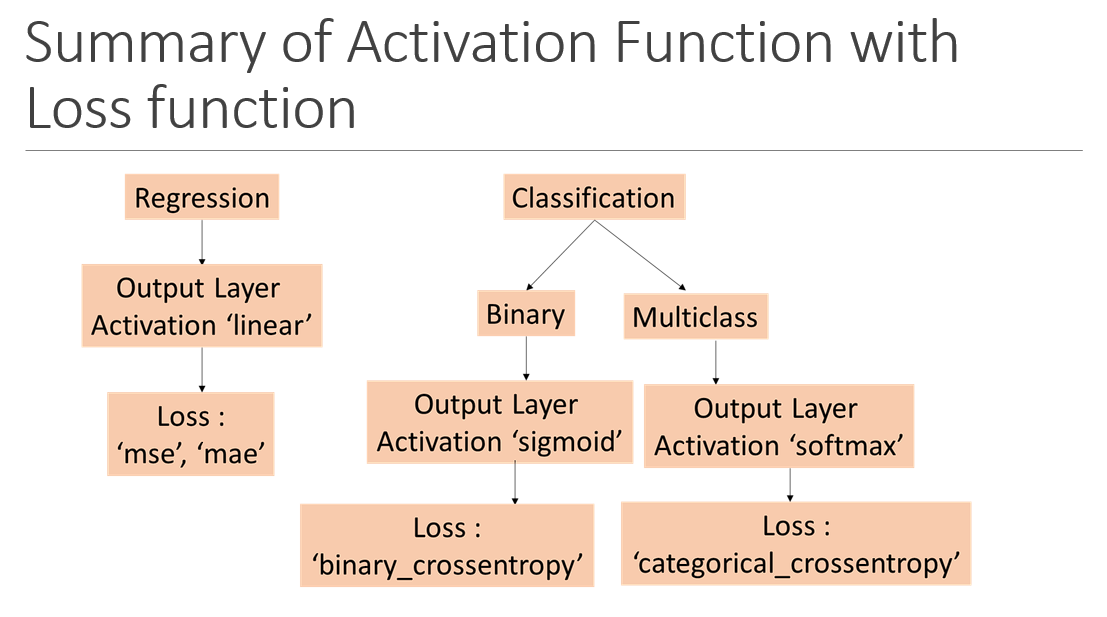

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Intialize Sequential model
model = Sequential()

# Add hidden layer 1 with input dimensions
model.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))

# Add hidden layer 2 
model.add(Dense(32,activation='relu'))

# Add Output layer
model.add(Dense(1,activation='linear'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the neural network

In [19]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

## Fitting the neural Network

In [20]:
hist = model.fit(xtrain, ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 8ms/step - loss: 11720.9795 - mae: 85.0107 - val_loss: 10536.8838 - val_mae: 83.3560
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 11630.3496 - mae: 84.6725 - val_loss: 10439.7998 - val_mae: 82.9629
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 11484.3516 - mae: 84.1340 - val_loss: 10271.9375 - val_mae: 82.2687
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 11240.1484 - mae: 83.1970 - val_loss: 9988.4287 - val_mae: 81.0602
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 10849.8770 - mae: 81.6487 - val_loss: 9535.6299 - val_mae: 79.0721
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 10232.9209 - mae: 79.1256 - val_loss: 8859.5098 - val_mae: 75.9661
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 9333.9277 - mae: 75.3487 - val_loss: 7946.7344 - val_mae: 71.5456
Epoch 8/100
20/20 

## Evaluate the model

In [21]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 798us/step - loss: 34.3609 - mae: 4.5267


[34.36094284057617, 4.526684284210205]

In [22]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 1ms/step - loss: 45.9095 - mae: 5.1426


[45.90946960449219, 5.142601490020752]

## Visualize the learning curve

In [24]:
hist.history['loss']

[11720.9794921875,
 11630.349609375,
 11484.3515625,
 11240.1484375,
 10849.876953125,
 10232.9208984375,
 9333.927734375,
 8154.40234375,
 6806.84521484375,
 5313.93896484375,
 3868.35546875,
 2652.89697265625,
 1696.0302734375,
 1056.474365234375,
 664.5706787109375,
 463.6993713378906,
 346.71148681640625,
 282.91046142578125,
 234.66281127929688,
 194.40390014648438,
 162.29861450195312,
 139.36001586914062,
 123.88578033447266,
 112.4544677734375,
 105.10926818847656,
 99.63323211669922,
 95.47419738769531,
 92.61027526855469,
 90.1104507446289,
 87.89573669433594,
 85.96003723144531,
 84.65382385253906,
 83.95022583007812,
 81.6080093383789,
 80.18536376953125,
 78.68064880371094,
 77.0670394897461,
 76.9257583618164,
 74.72137451171875,
 73.47710418701172,
 72.27806854248047,
 71.34146881103516,
 69.9115219116211,
 68.67466735839844,
 67.89810943603516,
 67.04540252685547,
 65.69630432128906,
 64.6621322631836,
 64.66328430175781,
 62.55607986450195,
 62.33961868286133,
 60.6903

In [25]:
hist.history['val_loss']

[10536.8837890625,
 10439.7998046875,
 10271.9375,
 9988.4287109375,
 9535.6298828125,
 8859.509765625,
 7946.734375,
 6808.8984375,
 5492.9462890625,
 4137.48291015625,
 2905.508544921875,
 1880.2952880859375,
 1159.91748046875,
 716.1336059570312,
 470.56219482421875,
 343.3455810546875,
 286.9656066894531,
 246.57470703125,
 212.1357879638672,
 180.6828155517578,
 155.72216796875,
 138.74118041992188,
 124.98469543457031,
 114.4419937133789,
 110.489013671875,
 104.91154479980469,
 102.40730285644531,
 99.90764617919922,
 98.99951171875,
 95.00328063964844,
 96.35066986083984,
 95.254150390625,
 91.75650787353516,
 92.19412231445312,
 91.24705505371094,
 88.68360137939453,
 88.37458801269531,
 86.96537017822266,
 86.88136291503906,
 87.9880599975586,
 83.74282836914062,
 82.7439956665039,
 84.02812194824219,
 81.0026626586914,
 82.9409408569336,
 80.2871322631836,
 81.05367279052734,
 79.59422302246094,
 78.0056381225586,
 78.57962036132812,
 76.00735473632812,
 77.355712890625,
 74

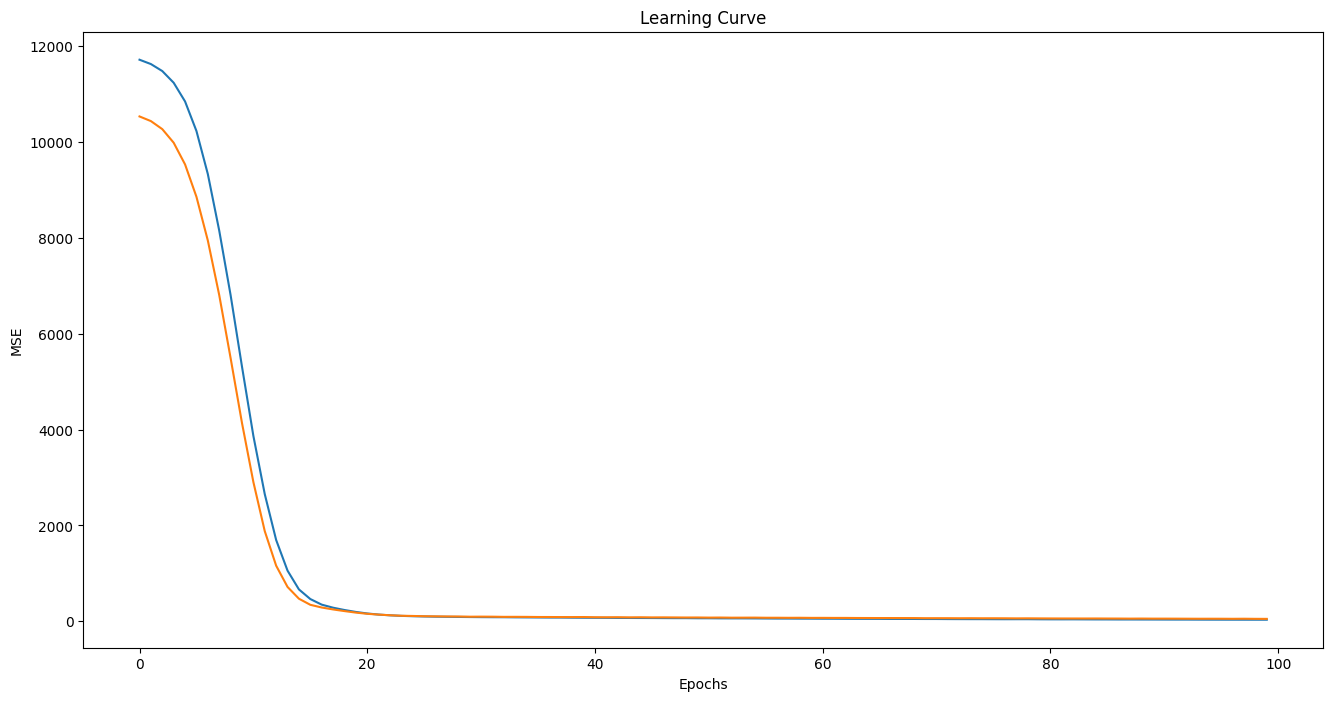

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Valdiation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.show()

### Prediction with the model

In [27]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

7/7 [==============================] - 0s 756us/step


In [28]:
ypred_tr[0:5]

array([[-86.466415],
       [-48.67702 ],
       [-51.407295],
       [-30.897675],
       [190.40825 ]], dtype=float32)

In [29]:
ytrain.head()

,y
42,-87.460751
574,-46.744227
314,-53.910407
572,-22.641812
903,197.162951


In [30]:
ypred_ts[0:5]

array([[-125.48277 ],
       [-157.7096  ],
       [ 139.01033 ],
       [  77.73131 ],
       [  57.731636]], dtype=float32)

In [31]:
ytest.head()

,y
662,-122.615868
414,-157.912325
707,132.037090
280,61.951339
609,51.402256


### Check mse, mae, r2 on testing

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
mse = mean_squared_error(ytest,ypred_ts)
mse

45.90947430127966

In [34]:
rmse = mse**(1/2)
rmse

6.775653053490834

In [35]:
mae = mean_absolute_error(ytest,ypred_ts)
mae

5.142601412657671

In [36]:
r2 = r2_score(ytest, ypred_ts)
r2

0.9962763064998578